# Data Wrangling project
## Made By Saad Alrazoq 
#### first step of the project is gathering data 


note that
* df1 = twitter archive enhanced 
* df2 = image predictions.tsv
* df3 = tweets json file

In [144]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import json 
import tweepy

In [145]:
## reading the twitter archive file and naming it df1
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [146]:
df1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [147]:
# Download the image prediction file using the link provided to Udacity students
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_url = requests.get(url, allow_redirects=True)

with open('image_predictions .tsv', mode='wb')as file : 
    file.write(image_url.content)
    df2 = pd.read_csv('image-predictions .tsv',sep='\t')

In [148]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### note that I have been told from my instructer that we are not able to get authoraization from tweeter so he asked us to read it normally and we write the API json code as a markdown just for prove 

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#### These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [149]:
# reading the tweet-json file and naming df3 
df3 = pd.read_json('tweet-json', lines= True)

In [150]:
df3.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing the data

In [151]:
# checking the df1 information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### from here we can notice that the tweet id type is int and we should change it to string 
#### also we can see there is 181 tweets which are retweets and we will delete them
#### removing the unwanted columns
#### also the timestamp data type changing it from string to date time type 
#### and there is some missing values in the expanded urls

In [152]:
#checking the statistics of the df1
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [153]:
# taking a look around the data set
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


## Quality problems for df1 
####  from here we can notice that the tweet id type is int and we should change it to string 
####  removing the unwanted columns
####  also the timestamp data type changing it from string to date time type 
#### create one column for dog type 
#### and there is some missing values in the expanded urls 

In [154]:
# checking the df2 information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [155]:
# taking a look around the data sets
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [156]:
# checking if there is a duplicated tweet, and there isn't
df2['tweet_id'].duplicated().sum()

0

In [157]:
# checking if there is jpg urls are duplicated and there are 66 of them
df2['jpg_url'].duplicated().sum()

66

In [158]:
df2.mean()

tweet_id    7.384514e+17
img_num     1.203855e+00
p1_conf     5.945483e-01
p1_dog      7.383133e-01
p2_conf     1.345886e-01
p2_dog      7.484337e-01
p3_conf     6.032417e-02
p3_dog      7.224096e-01
dtype: float64

In [159]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [160]:
df2.duplicated().sum()

0

In [161]:
df2['p1'].value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
black-footed_ferret      1
pencil_box               1
clog                     1
beach_wagon              1
water_buffalo            1
Name: p1, Length: 378, dtype: int64

## Quality problems for df2

#### there is 66 duplicated jpg_url, and we should drop them 
#### we can notice there is some underscores in p1 and p2 and p3 instead of spaces and they are useless 
#### some of the first letters in p1 and p2 and p3 aren't capital and some are, we should make them the same 

In [162]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [163]:
df3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [164]:
df3.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


## Quality problems for df3 
#### renaming the id column to tweet id
#### and dropping the unwanted columns 

# So in general 
## for df1:
 from here we can notice that the tweet id type is int and we should change it to string 
 
 remove tweets that are not original(retweets)
 
 also the timestamp data type changing it from string to date time type 
 
 create one column for dog type 
 
 and there is some missing values in the expanded urls 
 
## for df2:
 there is 66 duplicated jpg_url, and we should drop them
 
 and the tweet id type is int, and it should be string not int
 
 there is a problem with the capital letters in p1, p2 and p3 columns 
 
 we can notice there is some underscores in p1 and p2 and p3 instead of spaces and they are useless
 

## for df3: 
 renaming the id column to tweet id
 
 and dropping the unwanted columns 
 
 ## Tidiness data: 
 first one is that the same tweets are stored in 3 different tables, so we should merge them together
 
 create one column for dog type 
 

# Cleaning The Data

creating a copy for each data frame, just to be oragnaized 

In [165]:
df_clean = df1.copy()

In [166]:
df_image = df2.copy()

In [167]:
df_tweet = df3.copy()

### Starting with df1 quality problems 

1- fixing the tweet id type 

In [168]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')

2- remove tweets that are not original(retweets)

In [169]:
df_clean = df_clean[np.isnan(df_clean['retweeted_status_id'])]

In [170]:
## making sure it's empty
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [171]:
df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

In [172]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+

In [173]:
df_clean['rating_numerator']= df_clean['rating_numerator'].astype('float')

In [174]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   float64
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 254.9+

3- changing the timestamp to date time type 

In [175]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [176]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None


4- dropping the expanded urls missing values 

In [177]:
df_clean['expanded_urls'].isna().sum()

58

In [178]:
 df_clean['expanded_urls'].dropna(inplace=True)

In [179]:
df_clean['expanded_urls'].isna().sum()

0

In [180]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

## fixing quality for df2 

1- fixing the tweet id data type

In [181]:
df_image['tweet_id'] = df_image['tweet_id'].astype('str')

2- dropping the duplicates in jpg url

In [182]:
df_image['jpg_url'].duplicated().sum()

66

In [183]:
df_image['jpg_url'].drop_duplicates(inplace=True)

In [184]:
df_image['jpg_url'].duplicated().sum()

0

3- replacing the underscore with spaces 

In [185]:
df_image['p1'] = df_image['p1'].str.replace('_',' ')

In [186]:
df_image['p2'] = df_image['p2'].str.replace('_',' ')

In [187]:
df_image['p3'] = df_image['p3'].str.replace('_',' ')

In [188]:
df_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


4- fixing the capital words and capital letters, where some of them are capital and the others aren't 

In [189]:
df_image['p1']=df_image['p1'].str.lower()
df_image['p2']=df_image['p2'].str.lower();
df_image['p3']=df_image['p3'].str.lower();

In [190]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## fixing quality problems for df3 

1- renaming the id to tweet id so we can merge them later on 

In [191]:
df_tweet.rename(columns={'id':'tweet_id'}, inplace=True);

In [192]:
df_tweet.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [193]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [194]:
df_tweet['tweet_id']= df_tweet['tweet_id'].astype('str')

2- dropping useless columns in df3

In [195]:
df_tweet.drop(['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id','in_reply_to_user_id_str'
              ,'in_reply_to_screen_name','geo','coordinates','place','contributors','quoted_status_id','quoted_status_id_str','quoted_status'], axis =1, inplace=True)

In [196]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

## Tidiness data 

1- adding all the dogs into one column and fixing it 

In [197]:
# checking the columns names 
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [198]:
df_clean['dogs'] = df_clean['doggo'] + df_clean['floofer'] + df_clean['pupper'] + df_clean['puppo']

In [199]:
## checking what is the data we have on this columns so we can fix it 
df_clean['dogs'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [200]:
df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,NoneNoneNoneNone


In [201]:
df_clean.loc[df_clean['dogs'] == 'NoneNoneNoneNone',['dogs']] = 'None'
df_clean.loc[df_clean['dogs'] == 'doggoNoneNoneNone',['dogs']] = 'doggo'
df_clean.loc[df_clean['dogs'] == 'NoneNoneNonepuppo',['dogs']] = 'puppo'
df_clean.loc[df_clean['dogs'] == 'NoneNonepupperNone',['dogs']] = 'pupper'
df_clean.loc[df_clean['dogs'] == 'NoneflooferNoneNone',['dogs']] = 'floofer'
df_clean.loc[df_clean['dogs'] == 'doggoNoneNonepuppo',['dogs']] = 'doggo, puppo'
df_clean.loc[df_clean['dogs'] == 'doggoflooferNoneNone',['dogs']] = 'doggo, floofer'
df_clean.loc[df_clean['dogs'] == 'doggoNonepupperNone',['dogs']] = 'doggo, pupper'

In [202]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,None


In [203]:
df_clean.drop(['puppo','pupper','floofer','doggo'],axis=1, inplace=True)

In [204]:
df_clean.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,None,None


In [205]:
df_clean['dogs'].value_counts()

None              1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dogs, dtype: int64

In [206]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

2- merging and combining all the 3 tables together 

In [207]:
df_main = pd.merge(df_clean,df_image, on ='tweet_id', how = 'inner')

In [208]:
df_main = pd.merge(df_main,df_tweet, on='tweet_id', how='inner')

In [209]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1994 non-null   object             
 1   in_reply_to_status_id          23 non-null     float64            
 2   in_reply_to_user_id            23 non-null     float64            
 3   timestamp                      1994 non-null   datetime64[ns, UTC]
 4   source_x                       1994 non-null   object             
 5   text                           1994 non-null   object             
 6   expanded_urls                  1994 non-null   object             
 7   rating_numerator               1994 non-null   float64            
 8   rating_denominator             1994 non-null   int64              
 9   name                           1994 non-null   object             
 10  dogs                    

In [210]:
df_main.drop(['retweeted_status','possibly_sensitive_appealable','possibly_sensitive'],axis=1, inplace=True)

In [211]:
df_main.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,entities,extended_entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en


In [212]:
df_main['lang'].unique()

array(['en', 'in', 'eu', 'nl', 'et'], dtype=object)

## Saving the new main data set to a csv excel file 

In [213]:
df_main.to_csv('Twitter_Master.csv',index=False)

## at this step will start analyzing the data set

In [214]:
df_main.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,id_str,retweet_count,favorite_count
count,2.300000e+01,2.300000e+01,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,6.978112e+17,4.196984e+09,12.280843,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,7.358508e+17,2766.753260,8895.725677
std,4.359384e+16,0.000000e+00,41.497718,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,6.747816e+16,4674.698447,12213.193181
min,6.671522e+17,4.196984e+09,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,16.000000,81.000000
25%,6.732411e+17,4.196984e+09,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,6.758475e+17,624.750000,1982.000000
50%,6.757073e+17,4.196984e+09,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,7.084748e+17,1359.500000,4136.000000
75%,7.031489e+17,4.196984e+09,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,7.877873e+17,3220.000000,11308.000000
max,8.558181e+17,4.196984e+09,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,79515.000000,132810.000000


* from the previous table, we can see the average of favorites (likes) are 8556.7
* and the maximum likes waas 132810 likes 
* there is a difference between the retweets and the favorite, we can assume that people like to give favorite instead or retweeting it

## Checking Retweets vs Favorites 

No handles with labels found to put in legend.


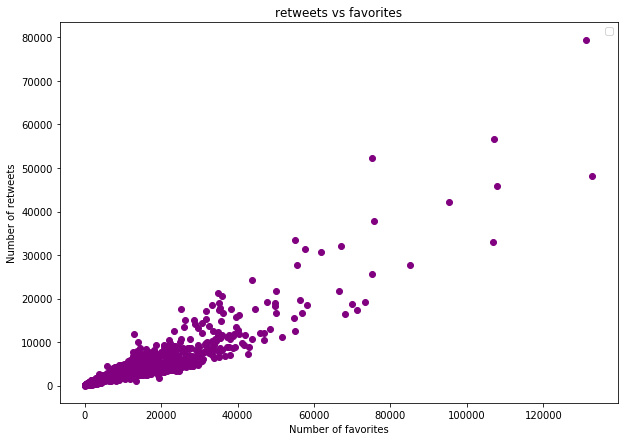

In [215]:
plt.figure(figsize=(10,7))
plt.scatter(df_main['favorite_count'],df_main['retweet_count'],color = "purple")
plt.title('retweets vs favorites')
plt.xlabel('Number of favorites')
plt.ylabel('Number of retweets')
plt.legend()
plt.show()

from the visuialization we made, we can see that there is a postive correlation between favorites and retweets

the higer favorites it gets, the more retweets possibly, or the opposite

also we calcualted the corrlation just to check that it's true

In [216]:
df_main.corr()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,id_str,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted
in_reply_to_status_id,1.000000,NaN,-0.078811,-0.067949,0.076881,0.425057,-0.079810,-0.392543,-0.210564,-0.341782,0.133557,0.685117,NaN,NaN,0.167515,0.595754,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,-0.078811,NaN,1.000000,0.198240,-0.000684,-0.009049,-0.029150,-0.020724,-0.034601,-0.004173,-0.029355,0.023630,NaN,NaN,0.013879,0.009995,0.000144,NaN
rating_denominator,-0.067949,NaN,0.198240,1.000000,-0.004094,-0.004240,0.000640,-0.034964,-0.000709,0.007071,0.004695,-0.022426,NaN,NaN,-0.021193,-0.028682,-0.003645,NaN
img_num,0.076881,NaN,-0.000684,-0.004094,1.000000,0.204406,0.032674,-0.156773,0.052354,-0.141409,0.062725,0.212854,NaN,NaN,0.107198,0.137053,0.017608,NaN
p1_conf,0.425057,NaN,-0.009049,-0.004240,0.204406,1.000000,0.126961,-0.509531,0.142268,-0.707994,0.119391,0.106469,NaN,NaN,0.054591,0.079727,-0.035617,NaN
p1_dog,-0.079810,NaN,-0.029150,0.000640,0.032674,0.126961,1.000000,0.109214,0.635698,0.045770,0.558604,0.120656,NaN,NaN,0.008552,0.054368,-0.016100,NaN
p2_conf,-0.392543,NaN,-0.020724,-0.034964,-0.156773,-0.509531,0.109214,1.000000,0.096064,0.480743,0.063713,-0.002557,NaN,NaN,-0.018472,-0.021680,-0.019817,NaN
p2_dog,-0.210564,NaN,-0.034601,-0.000709,0.052354,0.142268,0.635698,0.096064,1.000000,0.033552,0.554644,0.123795,NaN,NaN,0.016161,0.060189,-0.017334,NaN
p3_conf,-0.341782,NaN,-0.004173,0.007071,-0.141409,-0.707994,0.045770,0.480743,0.033552,1.000000,0.032731,-0.049237,NaN,NaN,-0.044230,-0.053752,-0.011424,NaN


### Checking the lanuages 

In [217]:
df_main['lang'].value_counts()

en    1987
nl       3
in       2
eu       1
et       1
Name: lang, dtype: int64

## from the numbers and the chart we can notice that 99% of the users are using english languages 

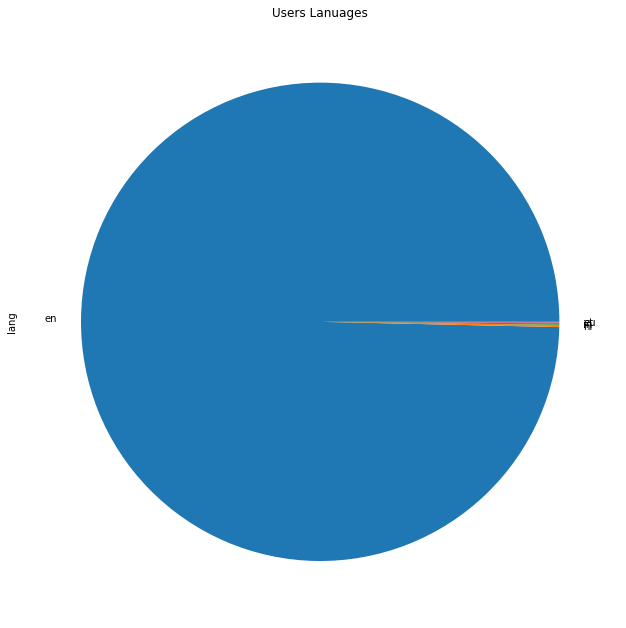

In [218]:
df_main['lang'].value_counts(normalize=True).plot(kind='pie',figsize=(20,11));
plt.title('Users Lanuages');

In [219]:
df_main['lang'].value_counts(normalize=True)

en    0.996489
nl    0.001505
in    0.001003
eu    0.000502
et    0.000502
Name: lang, dtype: float64

## Number of tweets monthly 

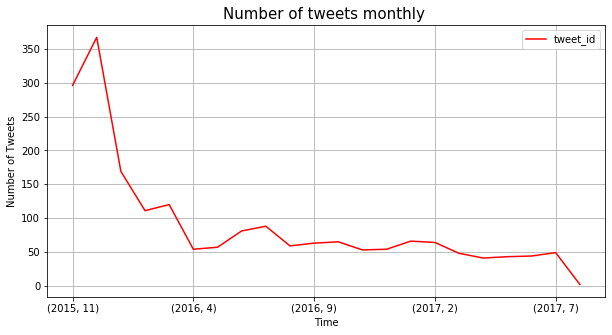

In [220]:
df_main['tweet_id'].groupby([df_main['timestamp'].dt.year, df_main['timestamp'].dt.month]).count().plot(kind='line',figsize=(10,5),color= 'r')
plt.title('Number of tweets monthly ', size=15)
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.grid()
plt.legend()
plt.show()